In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
cannabis = pd.read_csv("cannabis_full.csv")
cannabis = cannabis.dropna()
cannabis.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part One: Binary Classification

Since there's no specific target category, so we use accuracy as the measure metric for model selection

In [15]:
short = cannabis[cannabis['Type'].isin(['sativa', 'indica'])]
short.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Q1: LDA

In [16]:
X = short.drop(['Type', 'Strain', 'Effects', 'Flavor'], axis=1)
y = short['Type']


ct = ColumnTransformer([
    ("standardize", StandardScaler(), ["Rating"])
], remainder="passthrough").set_output(transform="pandas")


lda_pipeline = Pipeline([
    ("preprocessing", ct),
    ("lda", LinearDiscriminantAnalysis())
])

In [17]:
param_grid_lda = {
    'lda__solver': ['lsqr', 'eigen'],
    'lda__shrinkage': ['auto', 0.1, 0.5, 1.0],
    'lda__n_components': [None, 1],
}

grid_search = GridSearchCV(lda_pipeline, param_grid_lda, cv=5, scoring="accuracy", error_score="raise")

grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('lda', LinearDiscriminantAnalysis())]),
             param_grid={'lda__n_components': [None, 1],
                         'lda__shrinkage': ['auto', 0.1, 0.5, 1.0],
                         'lda__solver': ['lsqr', 'eigen']},
             scoring='accuracy')

In [18]:
lda_mean_accuracy = grid_search.cv_results_['mean_test_score']
df = pd.DataFrame(grid_search.cv_results_['params'])
df['accuracy_score'] = lda_mean_accuracy
df = df.sort_values(by = 'accuracy_score', ascending = False)
df.head()

,lda__n_components,lda__shrinkage,lda__solver,accuracy_score
4,NaN,0.5,lsqr,0.870778
5,NaN,0.5,eigen,0.870778
12,1.0,0.5,lsqr,0.870778
13,1.0,0.5,eigen,0.870778
2,NaN,0.1,lsqr,0.869848


In [19]:
# best cross validated accuracy score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'lda__n_components': None, 'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.8707779386599974


In [20]:
# fit the model
best_lda = Pipeline([
    ("preprocessing", ct),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage=0.5, n_components=None))
])

best_lda.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('lda',
                 LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr'))])

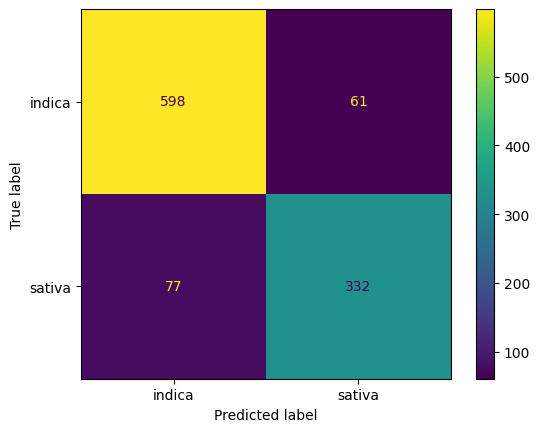

In [21]:
# confusion matrix
lda_y_pred = cross_val_predict(best_lda, X, y, cv=5)

conf_matrix = confusion_matrix(y, lda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_lda.classes_)
disp.plot(cmap="viridis")

### Q2: QDA

In [22]:
qda_pipeline = Pipeline([
    ("preprocessing", ct),
    ("qda", QuadraticDiscriminantAnalysis())
])

In [23]:
param_grid_qda = {
    "qda__reg_param": [0.0, 0.1, 0.5, 1.0],
}

grid_search_qda = GridSearchCV(qda_pipeline, param_grid_qda, cv=5, scoring="accuracy", error_score="raise")
grid_search_qda.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('qda',
                                        QuadraticDiscriminantAnalysis())]),
             param_grid={'qda__reg_param': [0.0, 0.1, 0.5, 1.0]},
             scoring='accuracy')

In [24]:
qda_mean_accuracy = grid_search_qda.cv_results_['mean_test_score']
df_qda = pd.DataFrame(grid_search_qda.cv_results_['params'])
df_qda['accuracy_score'] = qda_mean_accuracy
df_qda = df_qda.sort_values(by = 'accuracy_score', ascending = False)
df_qda.head()

,qda__reg_param,accuracy_score
1,0.1,0.862380
2,0.5,0.852056
3,1.0,0.838958
0,0.0,0.397012


In [25]:
# best cross validated accuracy score
print("Best Parameters for QDA:", grid_search_qda.best_params_)
print("Best Cross-Validated Accuracy for QDA:", grid_search_qda.best_score_)

Best Parameters for QDA: {'qda__reg_param': 0.1}
Best Cross-Validated Accuracy for QDA: 0.86237988679742


In [26]:
# fit the model
best_qda = Pipeline([
    ("preprocessing", ct),
    ("qda", QuadraticDiscriminantAnalysis(reg_param = 0.1))
])

best_qda.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))])

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


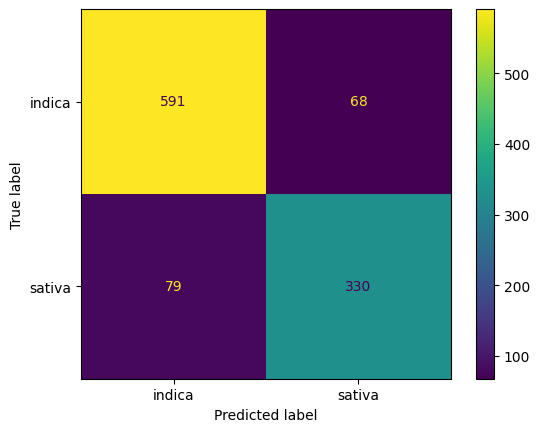

In [27]:
# confusion matrix
qda_y_pred = cross_val_predict(best_qda, X, y, cv=5)

conf_matrix = confusion_matrix(y, qda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_qda.classes_)
disp.plot(cmap="viridis")

### Q3: SVC

In [28]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())
])

In [29]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels
}

grid_search_svc = GridSearchCV(svc_pipeline, param_grid_svc, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [30]:
svc_mean_accuracy = grid_search_svc.cv_results_['mean_test_score']
df_svc = pd.DataFrame(grid_search_svc.cv_results_['params'])
df_svc['accuracy_score'] = svc_mean_accuracy
df_svc = df_svc.sort_values(by = 'accuracy_score', ascending = False)
df_svc.head()

,svc__C,svc__gamma,svc__kernel,accuracy_score
0,0.1,scale,linear,0.868918
3,0.1,auto,linear,0.868918
16,10.0,auto,rbf,0.867970
8,1.0,scale,poly,0.864249
7,1.0,scale,rbf,0.861437


In [31]:
# best cross validated accuracy score
print("Best Parameters for SVC:", grid_search_svc.best_params_)
print("Best Cross-Validated Accuracy for SVC:", grid_search_svc.best_score_)

Best Parameters for SVC: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best Cross-Validated Accuracy for SVC: 0.8689175551752883


In [32]:
# fit the model
best_svc = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=0.1, gamma='scale', kernel='linear'))
])

best_svc.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('svc', SVC(C=0.1, kernel='linear'))])

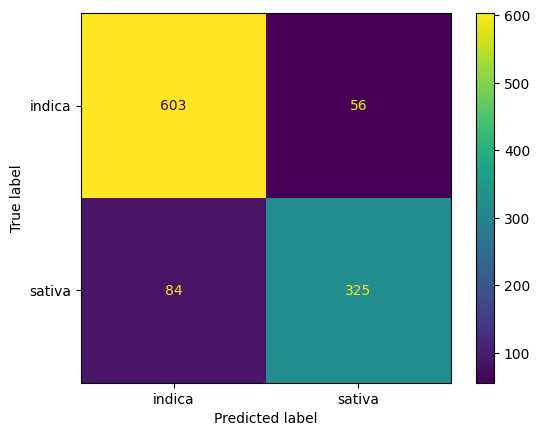

In [33]:
# confusion matrix
svc_y_pred = cross_val_predict(best_svc, X, y, cv=5)

conf_matrix = confusion_matrix(y, svc_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svc.classes_)
disp.plot(cmap="viridis")

### Q4: SVM

In [34]:
# svm uses the same pipeline but different parameters
svm_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())
])

In [35]:
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['poly'],
    'svc__gamma': ['scale', 'auto'],  # Only for rbf, poly, sigmoid kernels
    'svc__degree': [2, 3, 4],  # Only for poly kernel
    'svc__coef0': [0.0, 0.5, 1.0],  # Only for poly and sigmoid kernels
}
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring="accuracy", error_score="raise")
grid_search_svm.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__coef0': [0.0, 0.5, 1.0],
                         'svc__degree': [2, 3, 4],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['poly']},
             scoring='accuracy')

In [36]:
svm_mean_accuracy = grid_search_svm.cv_results_['mean_test_score']
df_svm = pd.DataFrame(grid_search_svm.cv_results_['params'])
df_svm['accuracy_score'] = svm_mean_accuracy
df_svm = df_svm.sort_values(by = 'accuracy_score', ascending = False)
df_svm.head()

,svc__C,svc__coef0,svc__degree,svc__gamma,svc__kernel,accuracy_score
43,10.0,0.5,2,auto,poly,0.868913
14,0.1,1.0,3,scale,poly,0.867983
45,10.0,0.5,3,auto,poly,0.867974
47,10.0,0.5,4,auto,poly,0.867040
8,0.1,0.5,3,scale,poly,0.866105


In [37]:
# best cross validated accuracy score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validated Accuracy for SVM:", grid_search_svm.best_score_)

Best Parameters for SVM: {'svc__C': 10, 'svc__coef0': 0.5, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Cross-Validated Accuracy for SVM: 0.8689131674783906


In [38]:
# fit the model
best_svm = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=10, coef0=0.5, degree=2, gamma='auto', kernel='poly'))
])
best_svm.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('svc',
                 SVC(C=10, coef0=0.5, degree=2, gamma='auto', kernel='poly'))])

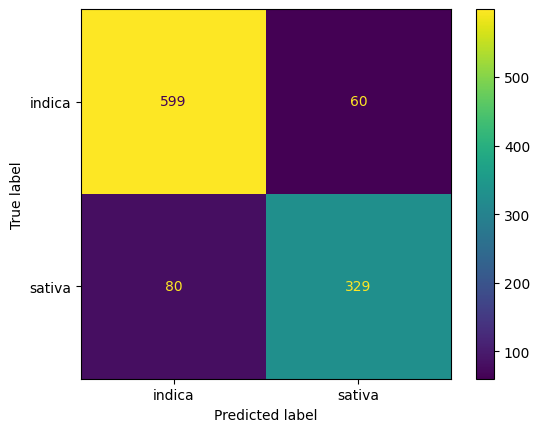

In [39]:
# confusion matrix
svm_y_pred = cross_val_predict(best_svm, X, y, cv=5)

conf_matrix = confusion_matrix(y, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm.classes_)
disp.plot(cmap="viridis")

In [40]:
model_names = ["LDA", "QDA", "SVC", "SVM"]
accuracy_scores = [grid_search.best_score_, grid_search_qda.best_score_, grid_search_svc.best_score_, grid_search_svm.best_score_]
model_results = {'Model': model_names, 'Best Accuracy Score': accuracy_scores}
part1_df = pd.DataFrame(model_results)
part1_df

,Model,Best Accuracy Score
0,LDA,0.870778
1,QDA,0.862380
2,SVC,0.868918
3,SVM,0.868913


## Part Two: Natural Multiclass

### Q1: Fit a decision tree, plot the final fit, and interpret the results.

In [41]:
X_full = cannabis.drop(['Type', 'Strain', 'Effects', 'Flavor'], axis=1)
y_full = cannabis['Type']


ct = ColumnTransformer([
    ("standardize", StandardScaler(), ["Rating"])
], remainder="passthrough").set_output(transform="pandas")


dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("tree", DecisionTreeClassifier(random_state=42))
])

In [42]:
param_grid_dt = {
    "tree__max_depth": range(1, 11),
    "tree__min_samples_split": range(2, 11),
    "tree__min_samples_leaf": range(1, 11)
}

grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='accuracy', error_score="raise")
grid_search_dt.fit(X_full, y_full)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'tree__max_depth': range(1, 11),
                         'tree__min_samples_leaf': range(1, 11),
                         'tree__min_samples_split': range(2, 11)},
             scoring='accuracy')

In [43]:
dt_mean_accuracy = grid_search_dt.cv_results_['mean_test_score']
df_dt = pd.DataFrame(grid_search_dt.cv_results_['params'])
df_dt['accuracy_score'] = dt_mean_accuracy
df_dt = df_dt.sort_values(by = 'accuracy_score', ascending = False)
df_dt.head()

,tree__max_depth,tree__min_samples_leaf,tree__min_samples_split,accuracy_score
181,3,1,3,0.619808
199,3,3,3,0.619808
201,3,3,5,0.619808
202,3,3,6,0.619808
203,3,3,7,0.619808


In [44]:
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_dt.best_score_)

Best Parameters: {'tree__max_depth': 3, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Best Cross-Validated Accuracy: 0.6198084064030954


In [45]:
best_dt = Pipeline([
    ("preprocessing", ct),
    ("tree", DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42))
])

best_dt.fit(X_full, y_full)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('tree', DecisionTreeClassifier(max_depth=3, random_state=42))])

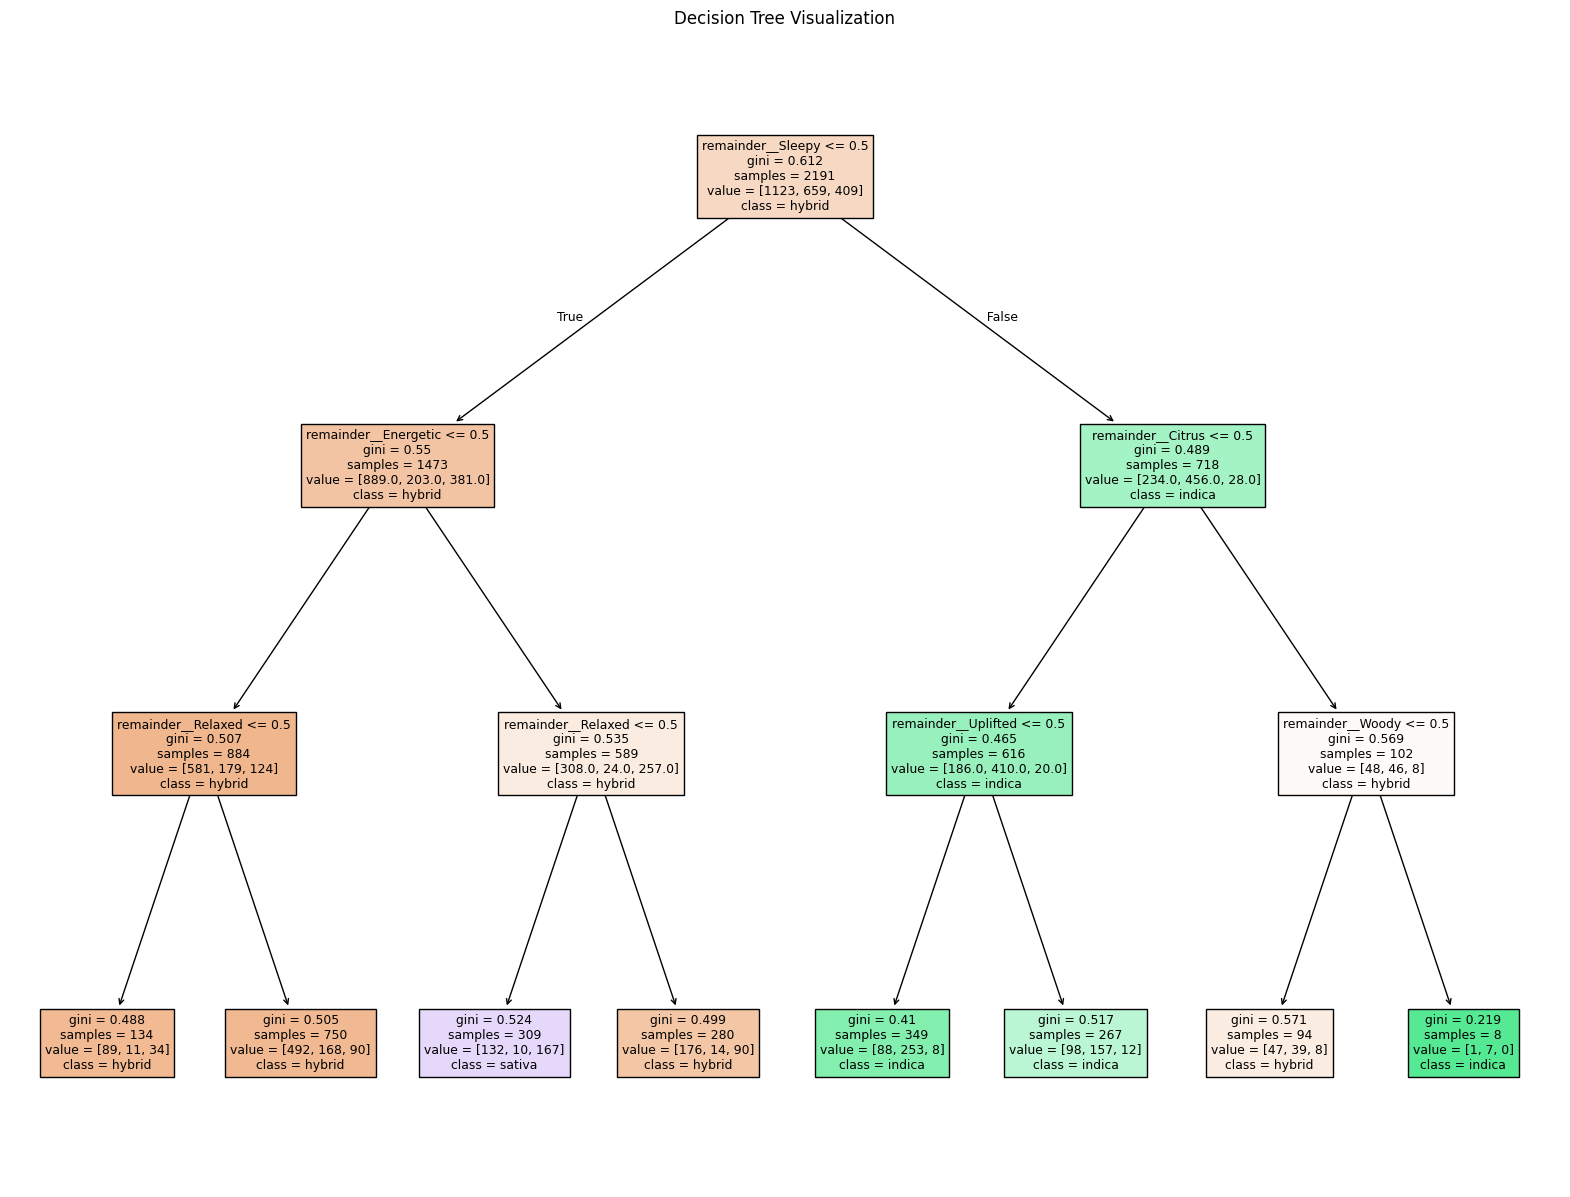

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fitted_tree = best_dt.named_steps['tree']
class_names = [str(cls) for cls in fitted_tree.classes_]

plt.figure(figsize=(20, 15))
plot_tree(
    fitted_tree,
    feature_names=ct.get_feature_names_out(),
    class_names=class_names,  # Use string class names
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

#### General Structure
- Root Node: The first decisionis based on the whether remainder__Sleepy <= 0.5 or not
- Internal Nodes: Each node contains
  1. Feature Name
  2. Condition: the threshold used to split the data
  3. Gini Index: a measure of impurity(smaller values indicate purer splits)
  4. Samples: the number of smaples at this node
  5. Value: the distribution of samples across the classes(hybrid, indica, sativa)
  6. Class: the mjority class predicted at this node
- Leaf Nodes: Final decisions



#### The tree
- First Split: remainder__Sleepy <= 0.5 goes to the left branch, others to the right
- Left Branch(Node 1): Split based on whether remainder__Energetic <= 0.5 or not
- Right Branch(Node 2): Split based on remainder__Citrus <= 0.5 or not
- Leaf Node(Bottom Nodes):
take the bottom-left leaf node:
Sample: 134, Class: hybrid -> Indicates that 134 samples at this node are classified as hybrid

### Q2: Repeat the analyses from Part One for LDA, QDA, and KNN.

In [47]:
# LDA
grid_search.fit(X_full, y_full)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'lda__n_components': None, 'lda__shrinkage': 0.1, 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.6275647226469456


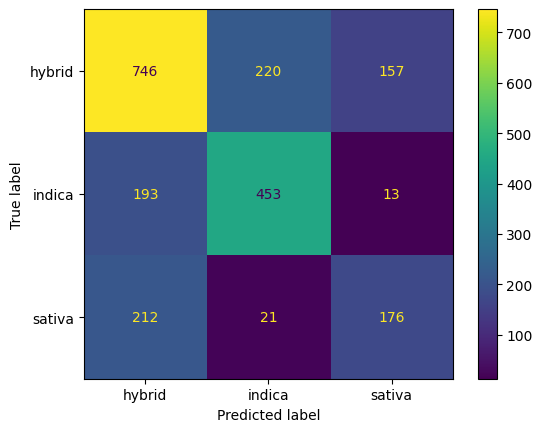

In [48]:
# fit the model
full_lda = Pipeline([
    ("preprocessing", ct),
    ("lda", LinearDiscriminantAnalysis(solver="lsqr", shrinkage=0.1, n_components=None))
])

full_lda.fit(X_full, y_full)

# confusion matrix
full_lda_y_pred = cross_val_predict(full_lda, X_full, y_full, cv=5)

conf_matrix = confusion_matrix(y_full, full_lda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=full_lda.classes_)
disp.plot(cmap="viridis")

In [49]:
# QDA
grid_search_qda.fit(X_full, y_full)

print("Best Parameters for QDA:", grid_search_qda.best_params_)
print("Best Cross-Validated Accuracy for QDA:", grid_search_qda.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Best Parameters for QDA: {'qda__reg_param': 0.5}
Best Cross-Validated Accuracy for QDA: 0.617073881070511


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


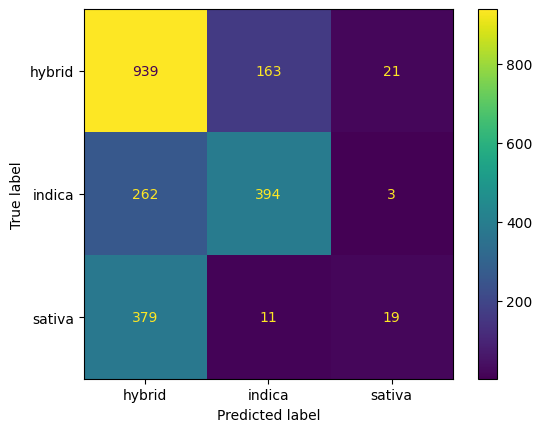

In [50]:
# fit the model
full_qda = Pipeline([
    ("preprocessing", ct),
    ("qda", QuadraticDiscriminantAnalysis(reg_param = 0.5))
])

full_qda.fit(X_full, y_full)

# confusion matrix
full_qda_y_pred = cross_val_predict(full_qda, X_full, y_full, cv=5)

conf_matrix = confusion_matrix(y_full, full_qda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=full_qda.classes_)
disp.plot(cmap="viridis")

In [51]:
# kNN
knn_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier())
])
param_grid_knn = {'knn__n_neighbors': range(1, 31)}
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy', error_score="raise")
grid_search_knn.fit(X_full, y_full)

print("Best Parameters for kNN:", grid_search_knn.best_params_)
print("Best Cross-Validated Accuracy for kNN:", grid_search_knn.best_score_)

Best Parameters for kNN: {'knn__n_neighbors': 28}
Best Cross-Validated Accuracy for kNN: 0.6134250735898316


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


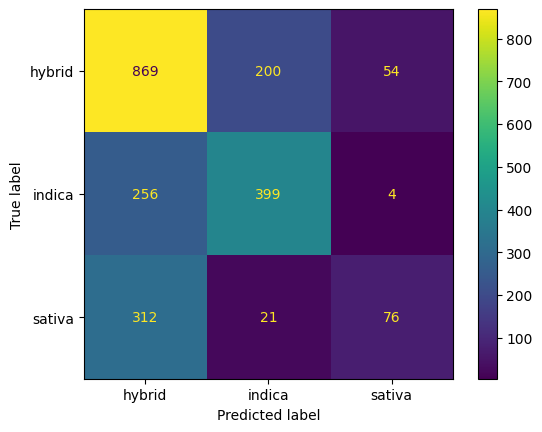

In [52]:
# fit the model
full_knn = Pipeline([
    ("preprocessing", ct),
    ("knn", KNeighborsClassifier(n_neighbors=28))
])

full_knn.fit(X_full, y_full)

# confusion matrix
full_knn_y_pred = cross_val_predict(full_knn, X_full, y_full, cv=5)

conf_matrix = confusion_matrix(y_full, full_knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=full_knn.classes_)
disp.plot(cmap="viridis")

### Q3: Were your metrics better or worse than in Part One? Why?

In [53]:
model_names = ["Decision Tree", "LDA", "QDA", "KNN"]
accuracy_scores = [grid_search_dt.best_score_, grid_search.best_score_, grid_search_qda.best_score_, grid_search_knn.best_score_]
model_results = {'Model': model_names, 'Best Accuracy Score': accuracy_scores}
part2_df = pd.DataFrame(model_results)
part2_df

,Model,Best Accuracy Score
0,Decision Tree,0.619808
1,LDA,0.627565
2,QDA,0.617074
3,KNN,0.613425


In [54]:
summary = pd.concat([part1_df, part2_df], axis=1)
summary

,Model,Best Accuracy Score,Model,Best Accuracy Score
0,LDA,0.870778,Decision Tree,0.619808
1,QDA,0.862380,LDA,0.627565
2,SVC,0.868918,QDA,0.617074
3,SVM,0.868913,KNN,0.613425


The metrics are worse than part one. This might be because
- Increased Complexity: In part1, the models have to differentiate between only two classes, which is usually simpler and requires fewer boundaries. While in part2, the models need to separate three classes, which is more complex and require more decision boundaries

### Which categories were most likely to get mixed up, according to the confusion matrices? Why?

1. Hybrid and Indica are commonly mixed up:
- In the LDA confusion matrix, 220 hybrid samples are predicted as indica, and 193 indica samples are predicted as hybrid
- In the QDA confusion matrix, 163 hybrid samples are predicted as indica, and 262 indica samples are predicted as hybrid
- In the KNN confusion matrix, 200 hybrid samples are predicted as indica and 256 indica samples are predicted as hybrid
2. Sativa and Hybrid are also mixed up
- In the LDA confusion matrix, 212 sativa samples are predicted as hybrid, and 157 hybrid samples are predicted as sativa
- In QDA and KNN confusion matrix, fewer misclassifications are observed

#### -> Hybrid and Indica are the most likely classes to get mixed up

## Part Three: Multiclass from Binary

### Q1 - SVC

In [55]:
cannabis['indica'] = (cannabis['Type'] == 'indica').astype(int)
cannabis['sativa'] = (cannabis['Type'] == 'sativa').astype(int)
cannabis['hybrid'] = (cannabis['Type'] == 'hybrid').astype(int)

In [56]:
X = cannabis.drop(['Type', 'indica', 'sativa', 'hybrid', 'Strain', 'Effects', 'Flavor'], axis=1)
y_indica = cannabis['indica']

svc_indica = Pipeline([
    ("preprocessing", ct),
    ("svc_ovr", SVC())
])

svc_ovr_param = {
    'svc_ovr__C': [0.1, 1, 10],  # Regularization parameter
    'svc_ovr__kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'svc_ovr__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels
}
grid_search_svc_indica = GridSearchCV(svc_indica, svc_ovr_param, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc_indica.fit(X, y_indica)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc_ovr', SVC())]),
             param_grid={'svc_ovr__C': [0.1, 1, 10],
                         'svc_ovr__gamma': ['scale', 'auto'],
                         'svc_ovr__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [57]:
y_sativa = cannabis['sativa']
svc_sativa = Pipeline([
    ("preprocessing", ct),
    ("svc_ovr", SVC())
])
grid_search_svc_sativa = GridSearchCV(svc_sativa, svc_ovr_param, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc_sativa.fit(X, y_sativa)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc_ovr', SVC())]),
             param_grid={'svc_ovr__C': [0.1, 1, 10],
                         'svc_ovr__gamma': ['scale', 'auto'],
                         'svc_ovr__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [58]:
y_hybrid = cannabis['hybrid']
svc_hybrid = Pipeline([
    ("preprocessing", ct),
    ("svc_ovr", SVC())
])
grid_search_svc_hybrid = GridSearchCV(svc_hybrid, svc_ovr_param, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc_hybrid.fit(X, y_hybrid)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc_ovr', SVC())]),
             param_grid={'svc_ovr__C': [0.1, 1, 10],
                         'svc_ovr__gamma': ['scale', 'auto'],
                         'svc_ovr__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [59]:
# best cross validated accuracy score
results = {
    "Model": ["Indica vs. Not Indica", "Sativa vs. Not Sativa", "Hybrid vs. Not Hybrid"],
    "Best Parameters": [
        grid_search_svc_indica.best_params_,
        grid_search_svc_sativa.best_params_,
        grid_search_svc_hybrid.best_params_,
    ],
    "Best CV Accuracy": [
        grid_search_svc_indica.best_score_,
        grid_search_svc_sativa.best_score_,
        grid_search_svc_hybrid.best_score_,
    ],
}
svc_ovr_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
svc_ovr_df

,Model,Best Parameters,Best CV Accuracy
0,Indica vs. Not Indica,"{'svc_ovr__C': 1, 'svc_ovr__gamma': 'scale', 'svc_ovr__kernel': 'rbf'}",0.790968
1,Sativa vs. Not Sativa,"{'svc_ovr__C': 1, 'svc_ovr__gamma': 'scale', 'svc_ovr__kernel': 'rbf'}",0.829757
2,Hybrid vs. Not Hybrid,"{'svc_ovr__C': 1, 'svc_ovr__gamma': 'scale', 'svc_ovr__kernel': 'rbf'}",0.629841


### Q1 - Logistic Regression

In [60]:
logreg_indica = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logreg__penalty': ['l1', 'l2'],       # Type of penalty (l1 for lasso, l2 for ridge)
    'logreg__solver': ['liblinear', 'saga'],  # Solver (adjust for penalty type)
    'logreg__tol': [1e-4, 1e-6]  # Convergence tolerance
}

In [61]:
grid_search_logreg_indica = GridSearchCV(logreg_indica, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg_indica.fit(X, y_indica)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [62]:
logreg_sativa = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
grid_search_logreg_sativa = GridSearchCV(logreg_sativa, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg_sativa.fit(X, y_sativa)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [63]:
logreg_hybrid = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
grid_search_logreg_hybrid = GridSearchCV(logreg_hybrid, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg_hybrid.fit(X, y_hybrid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [64]:
# best cross validated accuracy score
results = {
    "Model": ["Indica vs. Not Indica", "Sativa vs. Not Sativa", "Hybrid vs. Not Hybrid"],
    "Best Parameters": [
        grid_search_logreg_indica.best_params_,
        grid_search_logreg_sativa.best_params_,
        grid_search_logreg_hybrid.best_params_,
    ],
    "Best CV Accuracy": [
        grid_search_logreg_indica.best_score_,
        grid_search_logreg_sativa.best_score_,
        grid_search_logreg_hybrid.best_score_,
    ],
}
logreg_ovr_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
logreg_ovr_df

,Model,Best Parameters,Best CV Accuracy
0,Indica vs. Not Indica,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'logreg__tol': 0.0001}",0.799645
1,Sativa vs. Not Sativa,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.0001}",0.827473
2,Hybrid vs. Not Hybrid,"{'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'logreg__tol': 0.0001}",0.629847


In [65]:
# fit the model
best_indica_logreg = Pipeline([
    ("preprocessing", ct),
    ("logreg", LogisticRegression(C=0.1, penalty='l2', solver='liblinear', tol=0.0001, max_iter=1000, random_state=42))
])
best_indica_logreg.fit(X, y_indica)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [66]:
best_sativa_logreg = Pipeline([
    ("preprocessing", ct),
    ("logreg", LogisticRegression(C=0.1, penalty='l2', solver='saga', tol=0.0001, max_iter=1000, random_state=42))
])
best_sativa_logreg.fit(X, y_sativa)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42,
                                    solver='saga'))])

In [67]:
best_hybrid_logreg = Pipeline([
    ("preprocessing", ct),
    ("logreg", LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=0.0001, max_iter=1000, random_state=42))
])
best_hybrid_logreg.fit(X, y_hybrid)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['Rating'])])),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [68]:
summary = {
    "Model": ["Indica vs. Not Indica", "Sativa vs. Not Sativa", "Hybrid vs. Not Hybrid"],
    "SVC scores": [
        grid_search_svc_indica.best_score_,
        grid_search_svc_sativa.best_score_,
        grid_search_svc_hybrid.best_score_,
    ],
    "Logistic scores": [
        grid_search_logreg_indica.best_score_,
        grid_search_logreg_sativa.best_score_,
        grid_search_logreg_hybrid.best_score_,
    ],
}
summary_df = pd.DataFrame(summary)
summary_df

,Model,SVC scores,Logistic scores
0,Indica vs. Not Indica,0.790968,0.799645
1,Sativa vs. Not Sativa,0.829757,0.827473
2,Hybrid vs. Not Hybrid,0.629841,0.629847


### Q2 - Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

Logistic regression indica vs. not indica performs the best while SVC model hybrid vs. not hybrid did the worst.  
Indica's better performance makes sense intuitively due to its distinctiveness in cannabis strain types while hybrid performs the worst as it blends indica and sativa's features

### Q3 - SVC

In [69]:
cannabis_filter1 = cannabis[cannabis['Type'].isin(['indica', 'sativa'])]
cannabis_filter1 = cannabis_filter1.dropna()
#cannabis_filter1.head()

In [70]:
X1 = cannabis_filter1.drop(['Type', 'indica', 'sativa', 'hybrid', 'Strain', 'Effects', 'Flavor'], axis=1)
y1 = cannabis_filter1['Type']

svc1_ovo = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())
])

param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels
}

grid_search_svc1_ovo = GridSearchCV(svc1_ovo, param_grid_svc, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc1_ovo.fit(X1, y1)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [71]:
cannabis_filter2 = cannabis[cannabis['Type'].isin(['indica', 'hybrid'])]
cannabis_filter2 = cannabis_filter2.dropna()
X2 = cannabis_filter2.drop(['Type', 'indica', 'sativa', 'hybrid', 'Strain', 'Effects', 'Flavor'], axis=1)
y2 = cannabis_filter2['Type']

svc2_ovo = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())
])

param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels
}

grid_search_svc2_ovo = GridSearchCV(svc2_ovo, param_grid_svc, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc2_ovo.fit(X2, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [72]:
cannabis_filter3 = cannabis[cannabis['Type'].isin(['sativa', 'hybrid'])]
cannabis_filter3 = cannabis_filter3.dropna()
X3 = cannabis_filter3.drop(['Type', 'indica', 'sativa', 'hybrid', 'Strain', 'Effects', 'Flavor'], axis=1)
y3 = cannabis_filter3['Type']

svc3_ovo = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())
])

param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'svc__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid' kernels
}

grid_search_svc3_ovo = GridSearchCV(svc3_ovo, param_grid_svc, cv=5, scoring="accuracy", error_score="raise")
grid_search_svc3_ovo.fit(X3, y3)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [73]:
# best cross validated accuracy score
results = {
    "Model": ["Indica vs. Sativa", "Indica vs. Hybrid", "Hybrid vs. Sativa"],
    "Best Parameters": [
        grid_search_svc1_ovo.best_params_,
        grid_search_svc2_ovo.best_params_,
        grid_search_svc3_ovo.best_params_,
    ],
    "Best CV Accuracy": [
        grid_search_svc1_ovo.best_score_,
        grid_search_svc2_ovo.best_score_,
        grid_search_svc3_ovo.best_score_,
    ],
}
svc_ovo_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
svc_ovo_df

,Model,Best Parameters,Best CV Accuracy
0,Indica vs. Sativa,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}",0.868918
1,Indica vs. Hybrid,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}",0.757583
2,Hybrid vs. Sativa,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}",0.760439


### Q3 - Logistic Regression

In [74]:
logreg1 = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
grid_search_logreg1 = GridSearchCV(logreg1, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg1.fit(X1, y1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [75]:
logreg2 = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
grid_search_logreg2 = GridSearchCV(logreg2, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg2.fit(X2, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [76]:
logreg3 = Pipeline([
    ('preprocess', ct),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])
grid_search_logreg3 = GridSearchCV(logreg3, logreg_param_grid, scoring='accuracy', cv=5, error_score="raise")
grid_search_logreg3.fit(X3, y3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardize',
                                                                         StandardScaler(),
                                                                         ['Rating'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'logreg__tol': [0.0001, 1e-06]},
             scoring='accuracy')

In [77]:
# best cross validated accuracy score
results = {
    "Model": ["Indica vs. Sativa", "Indica vs. Hybrid", "Hybrid vs. Sativa"],
    "Best Parameters": [
        grid_search_logreg1.best_params_,
        grid_search_logreg2.best_params_,
        grid_search_logreg3.best_params_,
    ],
    "Best CV Accuracy": [
        grid_search_logreg1.best_score_,
        grid_search_logreg2.best_score_,
        grid_search_logreg3.best_score_,
    ],
}
logreg_ovo_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
logreg_ovo_df

,Model,Best Parameters,Best CV Accuracy
0,Indica vs. Sativa,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.0001}",0.870787
1,Indica vs. Hybrid,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.0001}",0.762635
2,Hybrid vs. Sativa,"{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga', 'logreg__tol': 0.0001}",0.752598


In [78]:
summary2 = {
    "Model": ["Indica vs. Sativa", "Indica vs. Hybrid", "Hybrid vs. Sativa"],
    "SVC scores": [
        grid_search_svc1_ovo.best_score_,
        grid_search_svc2_ovo.best_score_,
        grid_search_svc3_ovo.best_score_,
    ],
    "Logistic scores": [
        grid_search_logreg1.best_score_,
        grid_search_logreg2.best_score_,
        grid_search_logreg3.best_score_,
    ],
}
summary2_df = pd.DataFrame(summary2)
summary2_df

,Model,SVC scores,Logistic scores
0,Indica vs. Sativa,0.868918,0.870787
1,Indica vs. Hybrid,0.757583,0.762635
2,Hybrid vs. Sativa,0.760439,0.752598


### Q4 - Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

<ipython-input-79-a0ff2fcbf123>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cannabis, x='Type', y='Rating', palette='viridis')


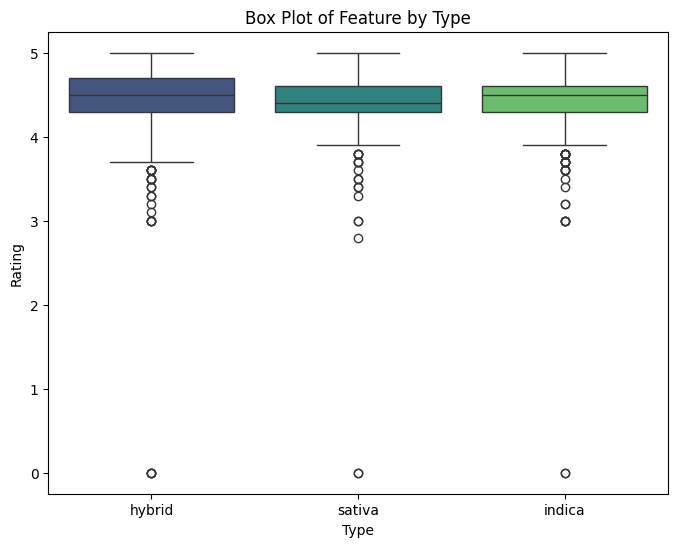

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=cannabis, x='Type', y='Rating', palette='viridis')

# Add labels and title
plt.title('Box Plot of Feature by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

Logistic regression indica vs. sativa performs the best while Logistic regression model hybrid vs. sativa did the worst. This result make sense intuitively since indica and sativa are often considered the two primary cannabis types while hybrid blends characteristics of both indica and sativa.

Same logic as above, hybrid vs. sativa performs worst since hybrid share characteristics with sativa.


### Q5 - Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?
### What about for SVC?

According to sklearn's documentation, the default approach that Logistic Regression handles multiclass classification is One-vs-Rest while SVC, the default approach is One-vs-One